# 对MNIST数据集进行PCA主成分分析降维和K-means聚类

In [1]:
from PCA import *
from KMeans import *
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X = mnist.data
y = mnist.target.astype('int')

## PCA主成分分析降维, 784维降到64维

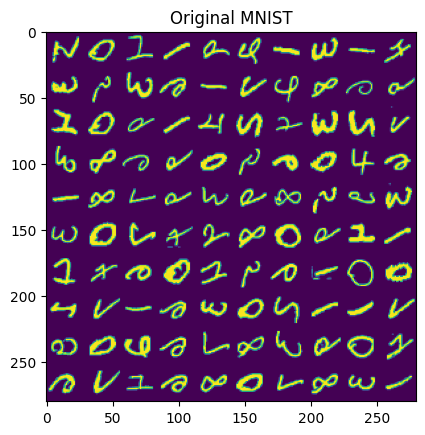

In [3]:
# 降维前数据可视化
display_data(X[:100, :], title='Original MNIST')

In [4]:
pca = PCA(64)  # 选择降维至 64 维，原维度为 784
Z = pca.fit(X).transform(X)
Z_recover = pca.recover(Z)

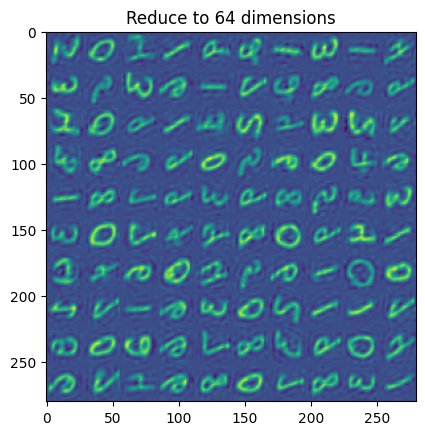

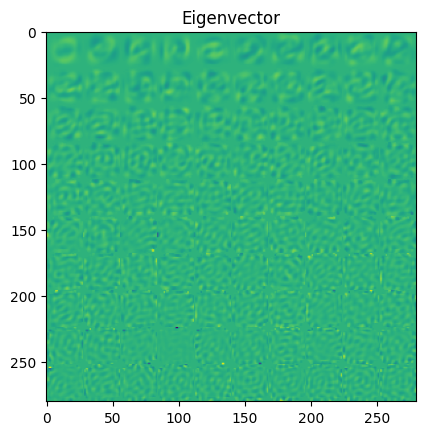

In [5]:
# 降维后的数据可视化
display_data(Z_recover[:100, :], title=f'Reduce to {pca.n_components} dimensions')
# 前 100 个特征向量可视化
display_data(pca.vecs[:, :100].T, title='Eigenvector')

## K-means聚类

In [6]:
labels = KMeans(10).fit(Z, epochs=50)
cluster = np.array([np.bincount(y[labels == i]).argmax() for i in range(10)])
predicted_labels = cluster[labels]
accuracy = accuracy_score(y, predicted_labels)
print(f"Cluster accuracy: {accuracy * 100:.2f}%")

100%|██████████| 50/50 [00:13<00:00,  3.58it/s]

Cluster accuracy: 59.17%
